In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

In [28]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.10              3.50               1.40              0.20
1                 4.90              3.00               1.40              0.20
2                 4.70              3.20               1.30              0.20
3                 4.60              3.10               1.50              0.20
4                 5.00              3.60               1.40              0.20
..                 ...               ...                ...               ...
145               6.70              3.00               5.20              2.30
146               6.30              2.50               5.00              1.90
147               6.50              3.00               5.20              2.00
148               6.20              3.40               5.40              2.30
149               5.90              3.00               5.10              1.80

[150 rows x 4 columns]>

In [30]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0
3,4.60,3.10,1.50,0.20,0
4,5.00,3.60,1.40,0.20,0


In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [33]:
df['flower name'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.10,3.50,1.40,0.20,0,setosa
1,4.90,3.00,1.40,0.20,0,setosa
2,4.70,3.20,1.30,0.20,0,setosa
3,4.60,3.10,1.50,0.20,0,setosa
4,5.00,3.60,1.40,0.20,0,setosa
...,...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,2,virginica
146,6.30,2.50,5.00,1.90,2,virginica
147,6.50,3.00,5.20,2.00,2,virginica
148,6.20,3.40,5.40,2.30,2,virginica


In [34]:
df_setosa = df[df.target == 0]
df_versicolor = df[df.target == 1]
df_virginica = df[df.target == 2]


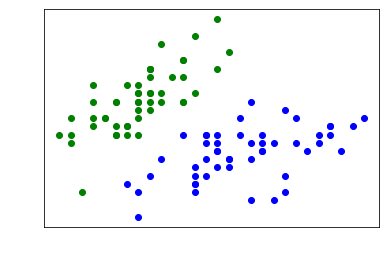

In [35]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(df_setosa['sepal length (cm)'], df_setosa['sepal width (cm)'], color = 'green')
plt.scatter(df_versicolor['sepal length (cm)'], df_versicolor['sepal width (cm)'], color = 'blue')

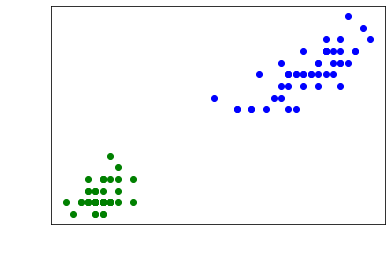

In [36]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(df_setosa['petal length (cm)'], df_setosa['petal width (cm)'], color = 'green')
plt.scatter(df_versicolor['petal length (cm)'], df_versicolor['petal width (cm)'], color = 'blue')
# plt.scatter(df_virginica['petal length (cm)'], df_virginica['petal width (cm)'], color = 'red')

In [37]:
X = df.drop(['target', 'flower name'], axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


In [39]:
y = df.target
y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32>

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10)

In [42]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [43]:
model.score(X_test, y_test)

0.9666666666666667